In [2]:
print('setup working!')

setup working!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('healthcare_messy_data.csv')
df_clean = df.copy()
print(df_clean.head())

       Patient Name  Age  Gender      Condition Medication     Visit Date  \
0        david lee    25   Other  Heart Disease  METFORMIN     01/15/2020   
1      emily davis   NaN    Male       Diabetes       NONE  April 5, 2018   
2   laura martinez    35   Other         Asthma  METFORMIN     2019.12.01   
3   michael wilson   NaN    Male       Diabetes  ALBUTEROL     01/15/2020   
4        david lee   NaN  Female         Asthma       NONE     2020/02/20   

  Blood Pressure  Cholesterol               Email  Phone Number  
0         140/90        200.0   name@hospital.org  555-555-5555  
1         120/80        200.0                 NaN           NaN  
2         110/70        160.0  contact@domain.com           NaN  
3         110/70          NaN   name@hospital.org  555-555-5555  
4         110/70        180.0                 NaN                


In [5]:
df_clean.shape
df_clean.info()
df_clean.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient Name    1000 non-null   object 
 1   Age             841 non-null    object 
 2   Gender          1000 non-null   object 
 3   Condition       794 non-null    object 
 4   Medication      1000 non-null   object 
 5   Visit Date      1000 non-null   object 
 6   Blood Pressure  834 non-null    object 
 7   Cholesterol     769 non-null    float64
 8   Email           616 non-null    object 
 9   Phone Number    821 non-null    object 
dtypes: float64(1), object(9)
memory usage: 78.3+ KB


Index(['Patient Name', 'Age', 'Gender', 'Condition', 'Medication',
       'Visit Date', 'Blood Pressure', 'Cholesterol', 'Email', 'Phone Number'],
      dtype='object')

In [6]:
df_clean.describe()

,Cholesterol
count,769.00000
mean,189.23277
std,22.28039
min,160.00000
25%,160.00000
50%,180.00000
75%,200.00000
max,220.00000


In [7]:
#Data Cleaning

In [8]:
df_clean.columns = df_clean.columns.str.strip()

In [9]:
#remove white spaces from column names
df_clean.columns = df_clean.columns.str.strip().str.lower().str.replace(' ', '_')

In [10]:
df_clean.columns

Index(['patient_name', 'age', 'gender', 'condition', 'medication',
       'visit_date', 'blood_pressure', 'cholesterol', 'email', 'phone_number'],
      dtype='object')

In [11]:
#check missing data 
missing = df_clean.isnull().sum().sort_values(ascending=False)
missing_percentage = (df_clean.isnull().sum()/df_clean.isnull().count()*100).sort_values(ascending=False)
pd.concat([missing, missing_percentage], axis=1, keys=['Total Missing', 'Percentage Missing']).transpose()   


,email,cholesterol,condition,phone_number,blood_pressure,age,patient_name,gender,medication,visit_date
Total Missing,384.0,231.0,206.0,179.0,166.0,159.0,0.0,0.0,0.0,0.0
Percentage Missing,38.4,23.1,20.6,17.9,16.6,15.9,0.0,0.0,0.0,0.0


In [12]:
#age

In [13]:
#check unique in age column
df_clean['age'].unique()

array(['25', nan, '35', '60', 'forty', '70'], dtype=object)

In [14]:
#fix age column
#change forty to 40
df_clean['age'] = df_clean['age'].replace('forty', '40')
# convert age column to numeric values, forcing errors to NaN
df_clean['age'] = pd.to_numeric(df_clean['age'], errors='coerce')
# fill missing or NaN values with the median age
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())
#change data type to integer
df_clean['age'] = df_clean['age'].astype(int)


In [15]:
df_clean['age'].head()

0    25
1    40
2    35
3    40
4    40
Name: age, dtype: int32

In [16]:
# check cholesterol column
df_clean['cholesterol'].unique()

array([200., 160.,  nan, 180., 220.])

In [17]:
#fix cholesterol column
# correct non-numeric values in cholesterol column
df_clean['cholesterol'] = pd.to_numeric(df_clean['cholesterol'], errors='coerce')
# fill missing or NaN values with the median cholesterol
df_clean['cholesterol'] = df_clean['cholesterol'].fillna(df_clean['cholesterol'].median())
#change data type to integer
df_clean['cholesterol'] = df_clean['cholesterol'].astype(int)

In [18]:
df_clean['cholesterol'].head()

0    200
1    200
2    160
3    180
4    180
Name: cholesterol, dtype: int32

In [19]:
#blood pressure

In [20]:
#check blood pressure column
df_clean['blood_pressure'].unique()

array(['140/90', '120/80', '110/70', nan, '130/85'], dtype=object)

In [21]:
#fix blood pressure column
#split the blood pressure column into systolic and diastolic
bp_split = df_clean['blood_pressure'].str.split('/', expand=True)
#assign systolic and diastolic to new columns
df_clean['systolic'] = pd.to_numeric(bp_split[0], errors='coerce')
df_clean['diastolic'] = pd.to_numeric(bp_split[1], errors='coerce')
#fill missing values with median
df_clean['systolic'] = df_clean['systolic'].fillna(df_clean['systolic'].median())
df_clean['diastolic'] = df_clean['diastolic'].fillna(df_clean['diastolic'].median())
#change data type to integer
df_clean['systolic'] = df_clean['systolic'].astype(int)
df_clean['diastolic'] = df_clean['diastolic'].astype(int)
# recreate blood pressure column
# Extract systolic BP as float
df_clean['blood_pressure'] = df_clean['systolic'].astype(str) + '/' + df_clean['diastolic'].astype(str)
                                                     
                                     

In [22]:
#check blood pressure column again
df_clean[['blood_pressure','systolic','diastolic']].head()

,blood_pressure,systolic,diastolic
0,140/90,140,90
1,120/80,120,80
2,110/70,110,70
3,110/70,110,70
4,110/70,110,70


In [23]:
#condition and mediction

In [24]:
#check condition column
df_clean['condition'].unique()

array(['Heart Disease', 'Diabetes', 'Asthma', 'Hypertension', nan],
      dtype=object)

In [25]:
#fix condition column 
#fill nan missing value with unknown
df_clean['condition'] = df_clean['condition'].fillna('Unknown')
#change data type to catagory
df_clean['condition'] = df_clean['condition'].astype('category')


In [26]:
#check medication column
df_clean['medication'].unique()

array(['METFORMIN', 'NONE', 'ALBUTEROL', 'LISINOPRIL', 'ATORVASTATIN'],
      dtype=object)

In [27]:
#fix medication column
#change data type
df_clean['medication'] = df_clean['medication'].astype('category')

In [28]:
df_clean['medication'].dtypes

CategoricalDtype(categories=['ALBUTEROL', 'ATORVASTATIN', 'LISINOPRIL', 'METFORMIN',
                  'NONE'],
, ordered=False, categories_dtype=object)

In [29]:
# define correct condition-to-medication mapping
correct_mapping = {
    'Diabetes': 'METFORMIN',
    'Heart Disease': 'ATORVASTATIN',
    'Hypertension': 'LISINOPRIL',
    'Asthma': 'ALBUTEROL',
    None: 'NONE'  # for 'nan' or None condition, set medication to 'NONE'
}

In [30]:
# function to clean and validate medication based on condition
def clean_medication(row):
    condition = row['condition']
    # Check if the medication matches the correct mapping for the condition
    if row['medication'] != correct_mapping.get(condition, None):
        return correct_mapping.get(condition, 'NONE')  # if mismatch, replace with the correct medication
    return row['medication']  # if it's correct, keep the same

In [31]:
# apply the function to the dataset
df_clean['medication'] = df_clean.apply(clean_medication, axis=1) 

In [32]:
df_clean[['medication','condition']].head()

,medication,condition
0,ATORVASTATIN,Heart Disease
1,METFORMIN,Diabetes
2,ALBUTEROL,Asthma
3,METFORMIN,Diabetes
4,ALBUTEROL,Asthma


In [33]:
#visit date

In [34]:
#check visit date
df_clean['visit_date'].unique()

array(['01/15/2020', 'April 5, 2018', '2019.12.01', '2020/02/20',
       '03-25-2019'], dtype=object)

In [ ]:
# function to standardize dates into a consistent `YYYY-MM-DD` format
def standardize_date(date):
    formats = ['%m/%d/%Y', '%B %d, %Y', '%Y.%m.%d', '%Y/%m/%d', '%m-%d-%Y']
    for fmt in formats:
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # if all formats fail, return NaT

# apply the function to the column
df_clean['visit_date'] = df_clean['visit_date'].apply(standardize_date)

# format all valid dates to 'YYYY-MM-DD'
df_clean['visit_date'] = df_clean['visit_date'].dt.strftime('%Y-%m-%d')



In [36]:
df_clean['visit_date'] = pd.to_datetime(
    df_clean['visit_date'],
    errors='coerce',
    infer_datetime_format=True
)

C:\Users\27661\AppData\Local\Temp\ipykernel_8716\2783307096.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_clean['visit_date'] = pd.to_datetime(


In [37]:
#check visit date data type
df_clean['visit_date'].dtypes

dtype('<M8[ns]')

In [38]:
print(df_clean.columns.tolist())


['patient_name', 'age', 'gender', 'condition', 'medication', 'visit_date', 'blood_pressure', 'cholesterol', 'email', 'phone_number', 'systolic', 'diastolic']


In [39]:
df_clean['visit_date'].head()

0   2020-01-15
1   2018-04-05
2   2019-12-01
3   2020-01-15
4   2020-02-20
Name: visit_date, dtype: datetime64[ns]

In [40]:
#gender

In [41]:
#check gender column
df_clean['gender'].unique()

array(['Other', 'Male', 'Female'], dtype=object)

In [42]:
#fix gender colum
#fix data type
df_clean['gender'] = df_clean['gender'].astype('category')

In [43]:
#patient name

In [44]:
#generate patient id for private use
df_clean['patient_id'] = ['P' + str(i).zfill(5) for i in range(1, len(df_clean)+1)]
df_clean = df_clean[['patient_id'] + [c for c in df_clean.columns if c != 'patient_id']]


In [45]:
#drop patient name, email and number columns for privacy
df_clean = df_clean.drop(columns=['patient_name', 'email', 'phone_number'],  errors='ignore')

In [46]:
df_clean.head(10)

,patient_id,age,gender,condition,medication,visit_date,blood_pressure,cholesterol,systolic,diastolic
0,P00001,25,Other,Heart Disease,ATORVASTATIN,2020-01-15,140/90,200,140,90
1,P00002,40,Male,Diabetes,METFORMIN,2018-04-05,120/80,200,120,80
2,P00003,35,Other,Asthma,ALBUTEROL,2019-12-01,110/70,160,110,70
3,P00004,40,Male,Diabetes,METFORMIN,2020-01-15,110/70,180,110,70
4,P00005,40,Female,Asthma,ALBUTEROL,2020-02-20,110/70,180,110,70
5,P00006,40,Male,Hypertension,LISINOPRIL,2019-03-25,140/90,180,140,90
6,P00007,40,Male,Hypertension,LISINOPRIL,2020-02-20,120/80,180,120,80
7,P00008,60,Other,Unknown,NONE,2020-02-20,130/85,180,130,85
8,P00009,60,Other,Heart Disease,ATORVASTATIN,2020-01-15,140/90,180,140,90
9,P00010,40,Female,Unknown,NONE,2020-02-20,140/90,220,140,90


In [47]:
df_clean.dtypes

patient_id                object
age                        int32
gender                  category
condition               category
medication                object
visit_date        datetime64[ns]
blood_pressure            object
cholesterol                int32
systolic                   int32
diastolic                  int32
dtype: object

In [48]:
#filter

In [49]:
# first categorise to make things easier for eda

In [50]:
# group age into categories
def age_group(age):
  if age <=18:
    return 'Child'
  elif age <=35:
    return 'Young '
  elif age <=60:
    return 'Adult'
  else:
    return 'Senior'

df_clean['age_group'] = df_clean['age'].apply(age_group)

In [51]:
#blood pressure levels
def bp_category(row):
    sys = row['systolic']
    dia = row['diastolic']

    if sys < 120 and dia < 80:
        return 'Normal'
    elif 120 <= sys < 130 and dia < 80:
        return 'Elevated'
    elif sys >= 130 or dia >= 80:
        return 'High'
    else:
        return 'Unknown'

df_clean['bp_level'] = df_clean.apply(bp_category, axis=1)


In [52]:
# cholesterol levels
def cholesterol_level(value):
    if value < 200:
        return 'Normal'
    elif 200 <= value < 240:
        return 'Borderline High'
    else:
        return 'High'

df_clean['cholesterol_level'] = df_clean['cholesterol'].apply(cholesterol_level)


In [53]:
#categorize who is on medication
df_clean['on_medication'] = df_clean['medication'].apply(lambda x: 'Yes' if x != 'NONE' else 'No')


In [54]:
print(df_clean.head(10))

  patient_id  age  gender      condition    medication visit_date  \
0     P00001   25   Other  Heart Disease  ATORVASTATIN 2020-01-15   
1     P00002   40    Male       Diabetes     METFORMIN 2018-04-05   
2     P00003   35   Other         Asthma     ALBUTEROL 2019-12-01   
3     P00004   40    Male       Diabetes     METFORMIN 2020-01-15   
4     P00005   40  Female         Asthma     ALBUTEROL 2020-02-20   
5     P00006   40    Male   Hypertension    LISINOPRIL 2019-03-25   
6     P00007   40    Male   Hypertension    LISINOPRIL 2020-02-20   
7     P00008   60   Other        Unknown          NONE 2020-02-20   
8     P00009   60   Other  Heart Disease  ATORVASTATIN 2020-01-15   
9     P00010   40  Female        Unknown          NONE 2020-02-20   

  blood_pressure  cholesterol  systolic  diastolic age_group bp_level  \
0         140/90          200       140         90    Young      High   
1         120/80          200       120         80     Adult     High   
2         110/70     

In [55]:
df_clean.head(10)

,patient_id,age,gender,condition,medication,visit_date,blood_pressure,cholesterol,systolic,diastolic,age_group,bp_level,cholesterol_level,on_medication
0,P00001,25,Other,Heart Disease,ATORVASTATIN,2020-01-15,140/90,200,140,90,Young,High,Borderline High,Yes
1,P00002,40,Male,Diabetes,METFORMIN,2018-04-05,120/80,200,120,80,Adult,High,Borderline High,Yes
2,P00003,35,Other,Asthma,ALBUTEROL,2019-12-01,110/70,160,110,70,Young,Normal,Normal,Yes
3,P00004,40,Male,Diabetes,METFORMIN,2020-01-15,110/70,180,110,70,Adult,Normal,Normal,Yes
4,P00005,40,Female,Asthma,ALBUTEROL,2020-02-20,110/70,180,110,70,Adult,Normal,Normal,Yes
5,P00006,40,Male,Hypertension,LISINOPRIL,2019-03-25,140/90,180,140,90,Adult,High,Normal,Yes
6,P00007,40,Male,Hypertension,LISINOPRIL,2020-02-20,120/80,180,120,80,Adult,High,Normal,Yes
7,P00008,60,Other,Unknown,NONE,2020-02-20,130/85,180,130,85,Adult,High,Normal,No
8,P00009,60,Other,Heart Disease,ATORVASTATIN,2020-01-15,140/90,180,140,90,Adult,High,Normal,Yes
9,P00010,40,Female,Unknown,NONE,2020-02-20,140/90,220,140,90,Adult,High,Borderline High,No


In [56]:
#change datatypes for bp level , cholesterol level , age group and on medication
df_clean['age_group'] = df_clean['age_group'].astype('category')
df_clean['bp_level']= df_clean['bp_level'].astype('category')
df_clean['cholesterol_level']= df_clean['cholesterol_level'].astype('category')
df_clean['on_medication']= df_clean['on_medication'].astype('bool')




In [57]:
# eda

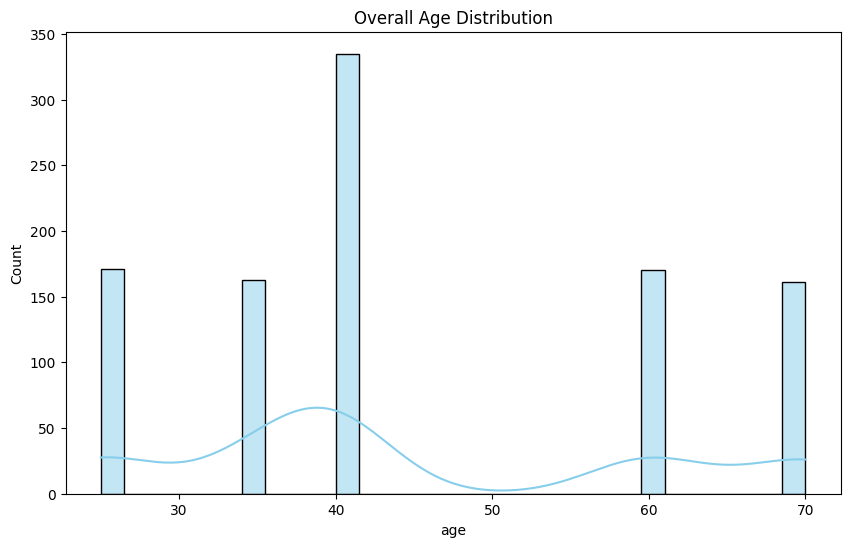

In [58]:
#overall age  distribution
figs = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(data=df_clean, x='age', bins=30, kde=True, color='skyblue')
plt.title('Overall Age Distribution')
xticks = plt.xticks()
plt.show()

In [59]:
#Most patients are in their mid-30s to 40s, with fewer youth and seniors, making the dataset skewed toward working adults. This reflects adult living patterns while underrepresenting younger and older citizens.

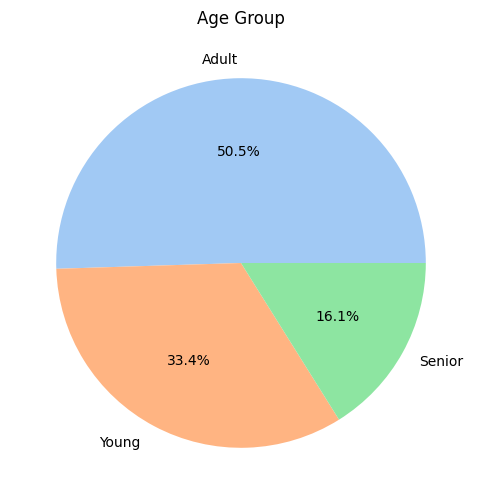

In [60]:
#age group
figs = plt.subplots(1, 1, figsize=(10, 6))
colors = sns.color_palette('pastel')
plt.pie(df_clean['age_group'].value_counts(), labels=df_clean['age_group'].value_counts().index, colors=colors, autopct='%1.1f%%')
plt.title('Age Group')
plt.show()

In [61]:
#Adults dominate the dataset, followed by youth and then seniors, confirming an imbalance that is common in health data.

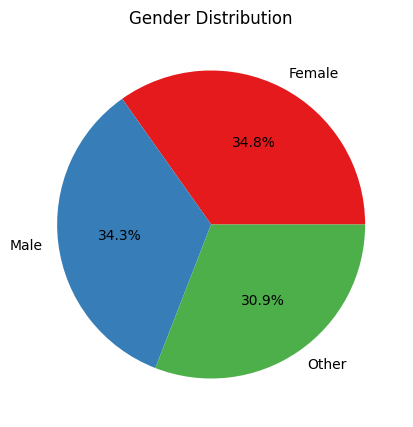

In [62]:
#gender distribution
figs = plt.subplots(1, 1, figsize=(8, 5))
colors = sns.color_palette('Set1')
plt.pie(df_clean['gender'].value_counts(), labels=df_clean['gender'].value_counts().index, colors=colors, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

In [63]:
#Gender distribution appears even, but the “Other” category may represent non-binary individuals or data collection issues. If misclassified, this variable could lead to misleading results.

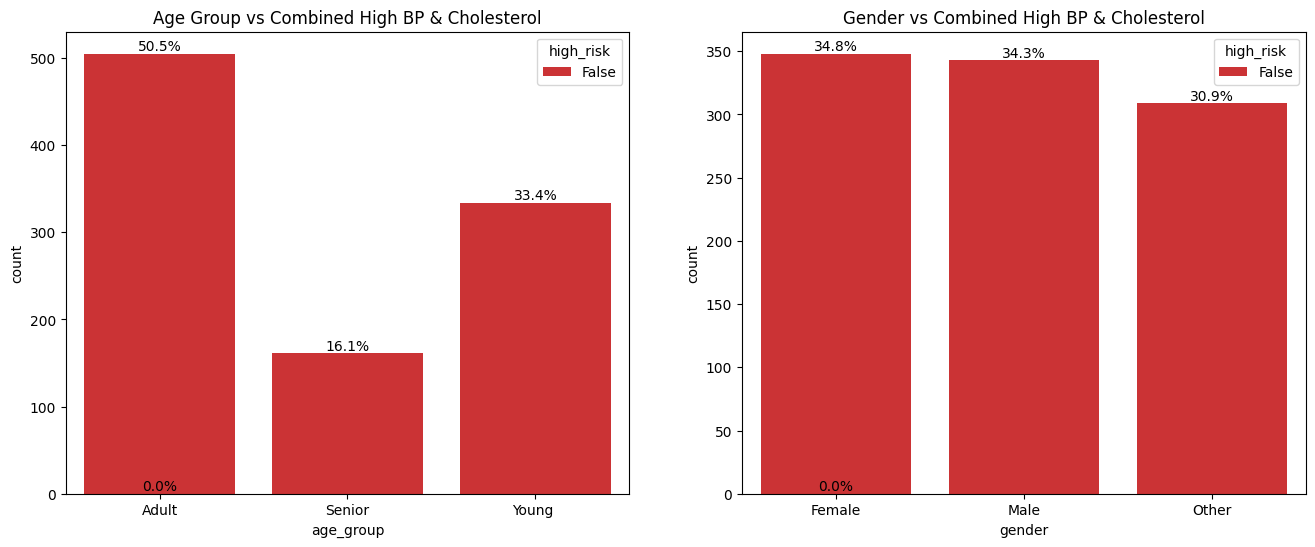

In [64]:
# 3. Combined risk: High BP AND High Cholesterol 
df_clean['high_risk'] = ( (df_clean['bp_level'] == 'High') & (df_clean['cholesterol_level'] == 'High') )
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(data=df_clean, x='age_group', hue='high_risk', palette='Set1', ax=axes[0])
axes[0].set_title('Age Group vs Combined High BP & Cholesterol')
sns.countplot(data=df_clean, x='gender', hue='high_risk', palette='Set1', ax=axes[1])
axes[1].set_title('Gender vs Combined High BP & Cholesterol')
for ax in axes:
    total = len(df_clean)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{100*height/total:.1f}%', 
                    (p.get_x() + p.get_width()/2., height), 
                    ha='center', va='bottom')
plt.show()

In [65]:
#Adults show the highest rates of combined high blood pressure and cholesterol, linked to stressful jobs and unhealthy habits. Seniors, though biologically more vulnerable, are underrepresented, while 33.4% of young adults being affected is concerning. Gender distribution is nearly equal, showing health risks here are not strongly gender-driven.

C:\Users\27661\AppData\Local\Temp\ipykernel_8716\2785251376.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='age_group', y='systolic', palette='Set3', ax=axes[0])
C:\Users\27661\AppData\Local\Temp\ipykernel_8716\2785251376.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='age_group', y='cholesterol', palette='Set1', ax=axes[1])


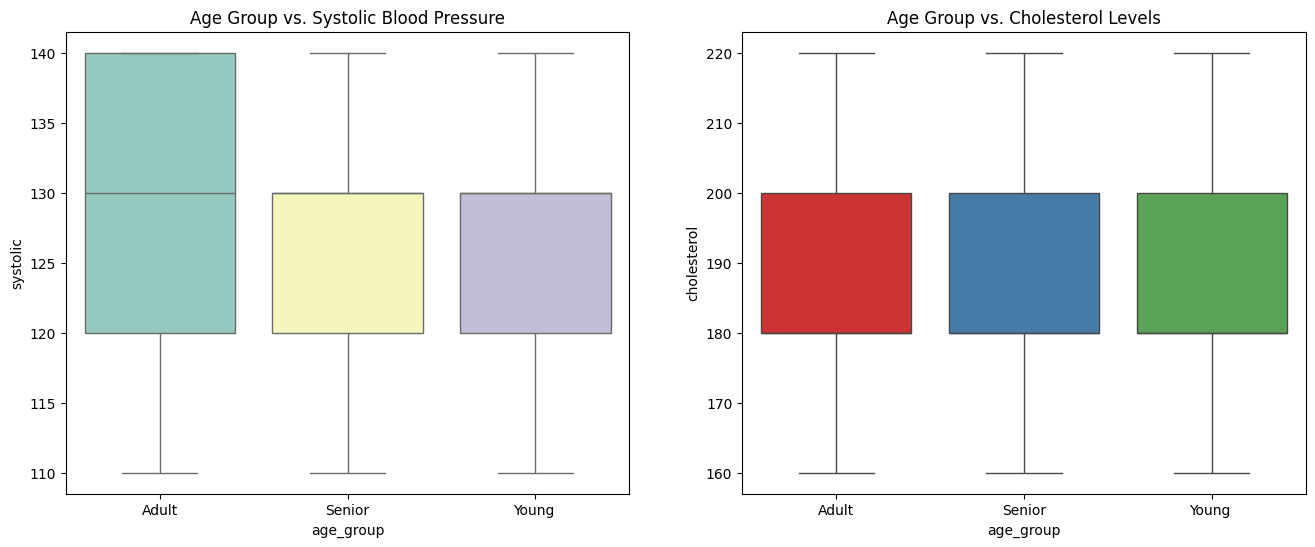

In [66]:
#Age Group vs Blood Pressure & Cholesterol Levels
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Age group vs blood pressure

sns.boxplot(data=df_clean, x='age_group', y='systolic', palette='Set3', ax=axes[0])
axes[0].set_title('Age Group vs. Systolic Blood Pressure')
# Age group vs cholesterol
sns.boxplot(data=df_clean, x='age_group', y='cholesterol', palette='Set1', ax=axes[1])
axes[1].set_title('Age Group vs. Cholesterol Levels')

plt.show()


In [67]:
#Systolic blood pressure values are consistent for youth and seniors, while adults show more variability due to their larger dataset share. Cholesterol levels are also consistent with no extreme outliers, suggesting most individuals are relatively healthy, though this contrasts with real-world trends where age often plays a role.

C:\Users\27661\AppData\Local\Temp\ipykernel_8716\2725436893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='gender', y='systolic', palette='Set1', ax=axes[0])
C:\Users\27661\AppData\Local\Temp\ipykernel_8716\2725436893.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='gender', y='cholesterol', palette='Set1', ax=axes[1])


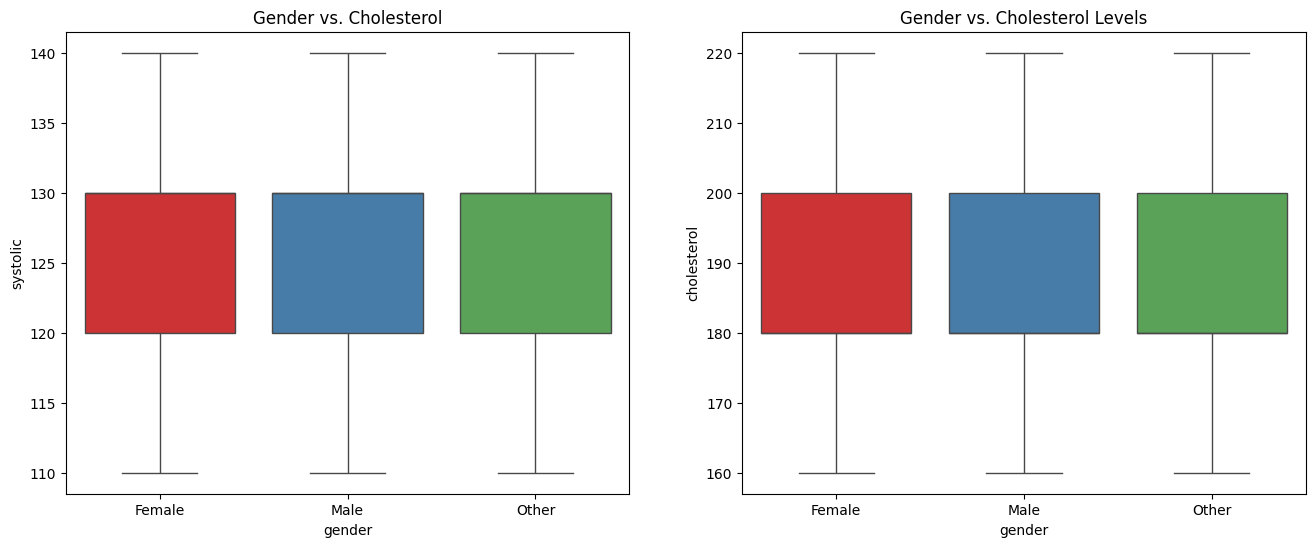

In [68]:
# Gender vs Cholesterol Levels 
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 
sns.boxplot(data=df_clean, x='gender', y='systolic', palette='Set1', ax=axes[0])
axes[0].set_title('Gender vs. Cholesterol')
sns.boxplot(data=df_clean, x='gender', y='cholesterol', palette='Set1', ax=axes[1])
axes[1].set_title('Gender vs. Cholesterol Levels')
plt.show()

In [69]:
#Gender differences in cholesterol and blood pressure are minimal, with short box plots and no extreme outliers. This suggests an evenly skewed dataset, which is unusual compared to real-world findings where gender often influences risk.

C:\Users\27661\AppData\Local\Temp\ipykernel_8716\4185228255.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='condition', palette='Set2', ax=ax)


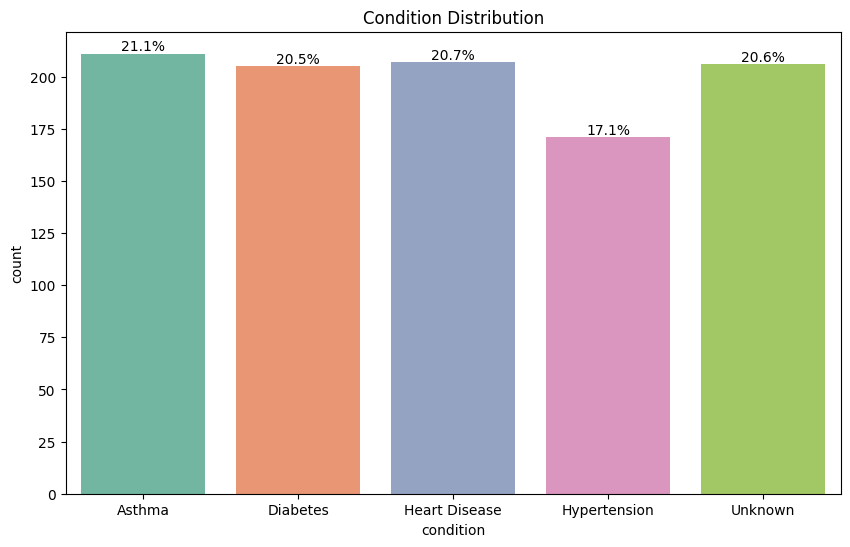

In [70]:

# Ddistribution based on condition
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df_clean, x='condition', palette='Set2', ax=ax)
ax.set_title('Condition Distribution')
total = len(df_clean)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{100*height/total:.1f}%', 
                (p.get_x() + p.get_width()/2., height), 
                ha='center', va='bottom')

plt.show()


In [71]:
#Conditions are almost equally distributed, with asthma slightly leading at 21.1%. Most individuals live with chronic illnesses and are medicated, while the “Unknown” group may represent undiagnosed cases. This highlights the need for interventions beyond blood pressure and cholesterol alone.

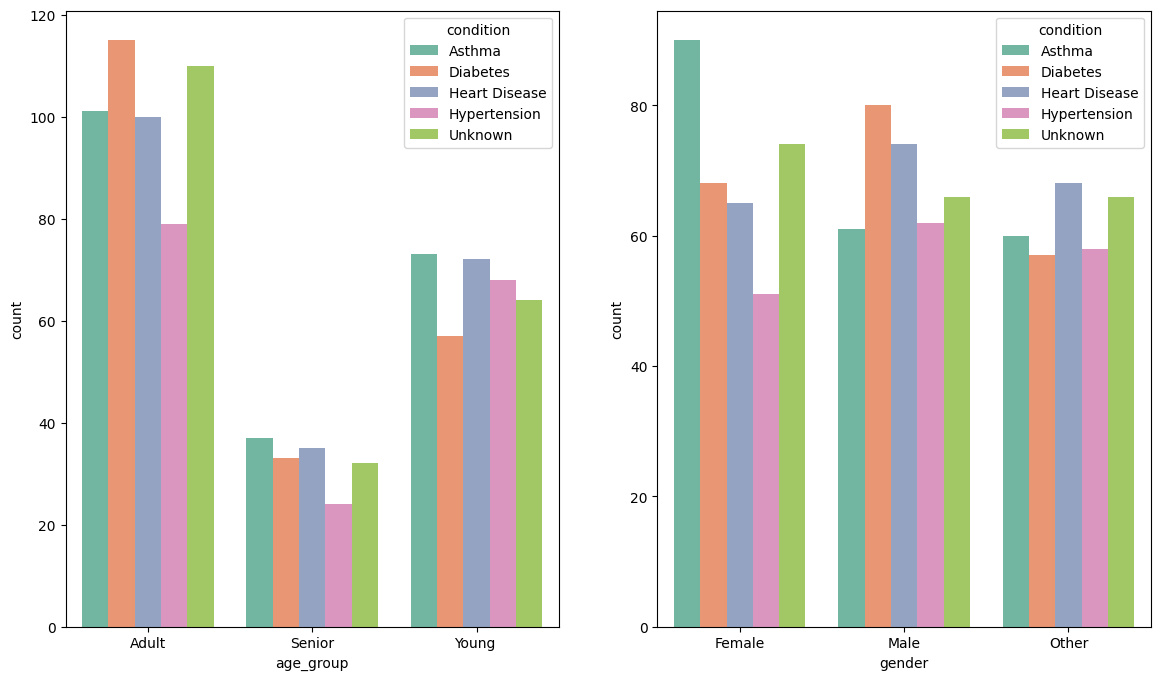

In [72]:
#age group vs condition and gender vs condition 
figs = plt.subplots(1, 2, figsize=(14, 8))
sns.countplot(data=df_clean, x='age_group', hue='condition', palette='Set2', ax=figs[1][0])
axes[0].set_title('Age Group vs. Condition')
sns.countplot(data=df_clean, x='gender', hue='condition', palette='Set2', ax=figs[1][1])
axes[1].set_title('Gender vs. Condition')
plt.show()

In [73]:
#Adults are most affected, especially by diabetes, reflecting unhealthy lifestyle habits like high sugar intake and energy drinks. Youth show more asthma cases, pointing to genetic or environmental factors, while seniors are vulnerable across all diseases. Gender differences exist: women lean toward asthma, men toward diabetes, and others toward heart disease.

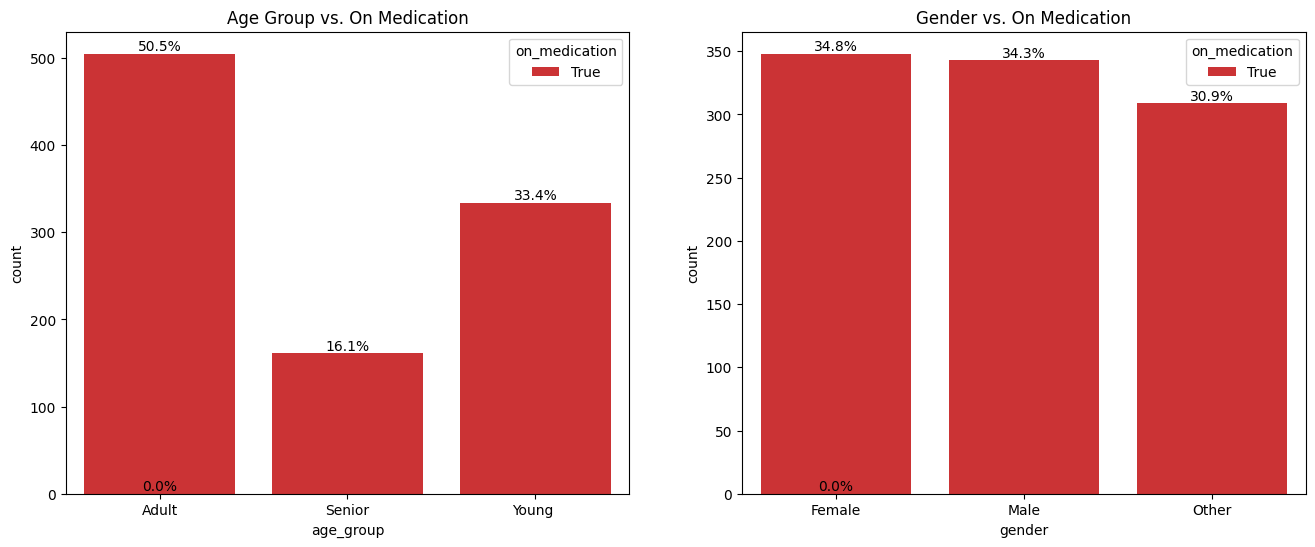

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Age group vs medication
sns.countplot(data=df_clean, x='age_group', hue='on_medication', palette='Set1', ax=axes[0])
axes[0].set_title('Age Group vs. On Medication')

# Gender vs medication
sns.countplot(data=df_clean, x='gender', hue='on_medication', palette='Set1', ax=axes[1])
axes[1].set_title('Gender vs. On Medication')

# Add percentage labels
for ax in axes:
    total = len(df_clean)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{100*height/total:.1f}%', 
                    (p.get_x() + p.get_width()/2., height), 
                    ha='center', va='bottom')

plt.show()


In [75]:
#Adults are the most medicated, reflecting their higher chronic disease burden. Youth medication use is worrying, showing illnesses start earlier, while seniors being less medicated highlights possible gaps in healthcare access. Gender differences are negligible, showing medication use is not strongly gender-driven.

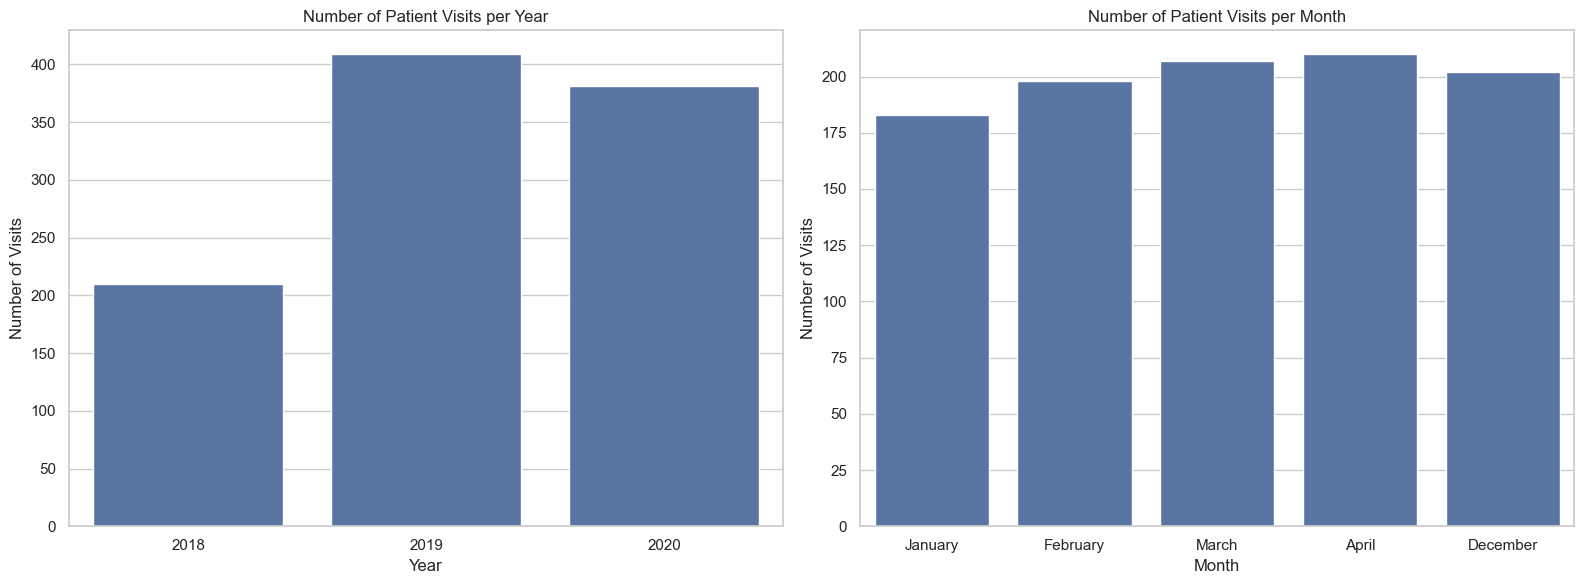

In [ ]:
df_clean['visit_date'] = pd.to_datetime(df_clean['visit_date'])

df_clean['visit_year'] = df_clean['visit_date'].dt.year
df_clean['visit_month'] = df_clean['visit_date'].dt.month_name()
df_clean['visit_month_num'] = df_clean['visit_date'].dt.month

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Visits per Year
year_counts = df_clean['visit_year'].value_counts().sort_index()

sns.barplot(
    x=year_counts.index,
    y=year_counts.values,
    ax=axes[0]
)

axes[0].set_title("Number of Patient Visits per Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Number of Visits")


#  Visits per Month
month_counts = (
    df_clean
    .groupby(['visit_month_num', 'visit_month'])
    .size()
    .reset_index(name='visits')
    .sort_values('visit_month_num')
)

sns.barplot(
    data=month_counts,
    x='visit_month',
    y='visits',
    ax=axes[1]
)

axes[1].set_title("Number of Patient Visits per Month")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Number of Visits")

plt.tight_layout()
plt.show()


In [77]:
#Visits peaked in 2019–2020, reflecting heightened health awareness during the pandemic. The steady monthly average of four visits suggests routine management of chronic conditions rather than crisis-driven care.

In [78]:
#Overall, the dataset highlights adult lifestyle-driven risks, underrepresentation of seniors, and balanced gender effects

In [79]:
print(df_clean.head(10))

  patient_id  age  gender      condition    medication visit_date  \
0     P00001   25   Other  Heart Disease  ATORVASTATIN 2020-01-15   
1     P00002   40    Male       Diabetes     METFORMIN 2018-04-05   
2     P00003   35   Other         Asthma     ALBUTEROL 2019-12-01   
3     P00004   40    Male       Diabetes     METFORMIN 2020-01-15   
4     P00005   40  Female         Asthma     ALBUTEROL 2020-02-20   
5     P00006   40    Male   Hypertension    LISINOPRIL 2019-03-25   
6     P00007   40    Male   Hypertension    LISINOPRIL 2020-02-20   
7     P00008   60   Other        Unknown          NONE 2020-02-20   
8     P00009   60   Other  Heart Disease  ATORVASTATIN 2020-01-15   
9     P00010   40  Female        Unknown          NONE 2020-02-20   

  blood_pressure  cholesterol  systolic  diastolic age_group bp_level  \
0         140/90          200       140         90    Young      High   
1         120/80          200       120         80     Adult     High   
2         110/70     

In [80]:
#save into csv
df_clean.to_csv('healthcare_clean_data.csv', index=False)